# (Pearl, 2009) Causal Inference in Statistics: An Overview

Took some notes on Pearl's paper in 2009 called "Causal Inference in Statistics: An Overview" - [link to paper](https://ftp.cs.ucla.edu/pub/stat_ser/r350-reprint.pdf)

Below, I attempt to summarize the main findings, keeping it as concise as possible.

Something I felt while reading this paper is that similar to quite a bit of the other work of Pearl that I've read (such as his book "The Book of Why"), it feels noticeably distinct from other causal inference papers. While other papers I've read on observational causal inference has focused on a problem and solving it with causal inference methodology, Pearl's work focuses not on the methods but developing the mathematical *theory* on causation itself. He is focused on creating the language while letting other scholars apply the language to do meaningful causal inference. Another note (perhaps a little bit amusing) is that I have not read work by Pearl where he doesn't take jabs at least two entities - and it always includes Donald Rubin and "traditional statisticians".






## 1. Introduction

In this section, he talks quite a bit about how scholars versed in traditional statistics have failed to understand the separation and language required when performing causal analyses relative to statistical analyses.

He claims that two concepts act as a wall that statisticians need to cope with to truly understand causal inference:
1. coping with untestable assumptions
2. acquiring new mathematical notation



## 2. From association to causation

Mentions how there's a few ways that causal expressions have been recognized in statistical literature.

In the potential-outcome notation, we use variables such as $Y_x(u)$ which stands for the value that outcome $Y$ *would take* in individual $u$ had treatment $X$ been at level $x$.

Alternatively, Pearl (1995a) uses $P(Y=y|do(X=x))$ to denote the probability that event ($Y=y$) would occur if treatment condition $X=x$ were enforced uniformly over the population.

A third notation uses grpahical models where arrows convey causal directionality.

## 3. Structural models, diagrams, causal effects, and counterfactuals

Pearl develops the *Structural Causal Model (SCM)*, which is the causal theory he developed, which he justifies because he says that a concept worthy of the title "theory" must be able to:
1. represent causal Q's in a mathematical language
2. provide precise language for communicating assumptions
3. provide a systematic way of answer some of these questions
4. provide method of determining what assumptions would be needed to answer "unnswerable" questions
5. must subsume any other theory or method that scientists have found useful in exploring causation

and that his theory fulfills it. He says that CSM combines features of SEM, the potential outcomes framework, and graphical models (used for causal analyses).


Take the following structural graphical model:

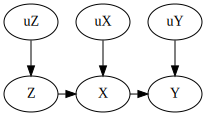

In [ ]:
# @title Fig. 2(a)
import graphviz as gr
g = gr.Digraph()
g.node('Z')
g.node('X')
g.node('Y')
g.node('a','uX')
g.node('b','uY')
g.node('c','uZ')

g.edge('Z','X',constraint='False')
g.edge('X','Y',constraint='False')
g.edges(['aX','bY','cZ'])
g

which correspond with a set of 3 functions
$$\begin{align}z&=f_Z(u_Z)\\x&=f_X(z,u_X)\\y&=f_Y(x,u_Y)\end{align}$$

Note how the above are nonparametric - they make no functional form assumptions. Traditionally, these equations have been expressed as linear models.

The causal effect of $X$ on $Y$ is captured in the arrow from $X$ to $Y$. $Z$ is a variable that affects $X$.

The $U_Z,U_X,U_Y$ are referred to as "exogenous" variables, which represent observed or unobserved background factors that the modeler decides to keep unexplained, as in nothing points to the exogenous variables. The variables with arrows going into it are called endogenous variables.

Note how in the above, it is implicitly stated in the graph that the exogenous variables of this model do not influence each other. In fact, there are a total of 7 causal assumptions made above, each corresponding to a missing arrow or a missing double-arrow between a pair of variables.

We can "tell" from the graph above that $Z$ is unassociated with $Y$ in every stratum of $X$. This is inferred using a graphical criterion known as $d$-separation (Pearl, 1988).

**Definition 1 ($d$-separation)**:

A set $S$ of nodes is said to block a path $p$ (can be a path that contains any number of nodes) if either
- (i) $p$ contains at least one arrow-emitting node (a node that has an arrow coming out of it) that is in $S$, or
- (ii) $p$ contains at least one collision node that is outside $S$ and has no descendant in $S$.

If $S$ blocks *all* paths from $X$ to $Y$, it is said to "$d$-separate $X$ and $Y$", and then, $X$ are independent given $S$, written $X\perp Y|S$

To make the above definition clear,

The path $U_Z\rightarrow Z\rightarrow X\rightarrow Y$ is blocked by $S=\{Z\}$ and $S=\{X\}$ since each fulfills (i). Thus, one thing we can say is that $U_Z\perp Y|X$.

Another example is that the path $U_Z\rightarrow Z\rightarrow X\leftarrow U_X$ is blocked by the null set $\{\emptyset\}$ but not $\{Y\}$. This is because according to (ii), the specified path contains a collision node $X$ that is not in $S=\{\emptyset\}$. However, $\{Y\}$ does not work because it is a descendent of the collision node $X$. Thus, marginal independence $U_Z\perp U_X$ holds but the conditional independence $U_Z\perp U_X|Y$ may not.




Going back to the nonparametric equations above ($z,x,y$), note how there is no variable $Z$ in $f_Y$. This conveys that variations in $Z$ will leave $Y$ unchanged as long as what is part of $f_Y$, which are $X,U_Y$ remain constant.

A system of such functions are said to be *structural* if they are assumed autonomous, that is, each function is invariant to possible changes in the form of the other functions.

This feature of "invariance" allows the use of structural equations as a basis for modeling causal effects and counterfactuals using an operator called $do(x)$ which simulates physical interventions by deleting certain functions from the model, replacing them by a constant $X=x$ while keeping the rest of the model unchanged.

For example, if we took the model $M$ from Fig. 2(a) and emulate an intervention $do(x_0)$ that holds $X$ constant at $X=x_0$, we get the following new model $M_{x_0}$:

$$\begin{align}z&=f_Z(u_Z)\\x&=x_0\\y&=f_Y(x,u_Y)\end{align}$$

with the corresponding graph:

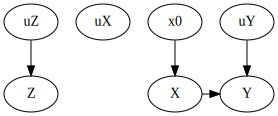

In [ ]:
# @title Fig. 2(b)
import graphviz as gr
g = gr.Digraph()
g.node('Z')
g.node('a','uX')
g.node('X')
g.node('d','x0')
g.node('Y')
g.node('b','uY')
g.node('c','uZ')

g.edge('d','X')
g.edge('X','Y',constraint='False')
g.edges(['bY','cZ'])
g

The joint distribution associated with the modified model, denoted $P(z,y|do(x_0))$ describes the post-intervention distribution of variables $Y,Z$, to be distinguished from the pre-intervention distribution $P(x,y,z)$.

In general, we formally define the post-intervention distribution by the equation:
$$P_M(y|do(X))\triangleq P_{M_x}(y)$$

Using this distribution, we can find the average difference with
$$E(Y|do(x_0'))-E(Y|do(x_o))$$

This can be a ratio of the averages (risk ratio), or even comparisons of variance or other distributional parameters.

These are all obtained using the $P(z,y|do(x_0))$ we got above by:
$$P(Y=y|do(x))=\sum_z P(z,y|do(x))$$

So to summarize, the central question is, can the controlled (post-intervention) distribution, $P(Y=y|do(x))$ be estimated from the pre-intervention distribution $P(z,x,y)$? Solving this question is a concept known as *identification*.

Let's refer to $Q(M)=P(y|do(x))$ as a *causal quantity*.

**Definition 2 (Identifiability)**:

A quantity $Q(M)$ is identifiable, given a set of assumptions $A$, if for any two models $M_1$ and $M_2$ that satisfy $A$, we have
$$P(M_1)=P(M_2)\rightarrow Q(M_1)=Q(M_2)$$

In other words, the details of the models of $M_1,M_2$ does not matter; what matters is that the assumptions of $A$ (encoded in the diagram) would constrain the variability of those details in such a way that equality of $P$'s entails the equality of $Q$'s.


So what we are really saying is, identification lets us take an uncalculatable causal quantity to actually be derived from observed data.

With a bit of derivation, Pearl demonstrates that under the assumptions:
1. $Y$ is a function of $X$ and $U_Y$ only
2. $U_Y$ is independent of $\{U_Z,U_X\}$ (hence of $X$)

Then,

$$E(Y|do(x_0))=E(Y|X=x_0)$$

In addition, he also shows that
$$E(Y|do(x_0))=\beta x_0$$

meaning that $\beta$ is endowed with the meaning of a causal "effect coefficient" (given the assumptions are met).

Remember, structural equations does not make any claims regarding $E(Y|X=x)$.





Now we get to an even more important concept.

Causal analysis in graphical models begins with the realization that all causal effects are identifiable whenever the model is *Markovian*, that is, the graph is acyclic and all error terms are jointly independent.

The key to these results rest with the following theorem:

**Theorem 1 (The Causal Markov Condition)**:

Any distribution generated by a Markovian model $M$ can be factorized as:
$$P(v_1,v_2,...,v_n)=\prod_iP(v_i|pa_i)$$

where $V_1,...,V_n$ are the endogenous variables in $M$, and $pa_i$ are values of the endogenous "parents" of $V_i$ in the causal diagram associated with $M$.

For example, the distribution associated with model $M$ in Fig. 2(a) can be factorized as:
$$P(z,y,x)=P(z)P(x|z)P(y|x)$$

This uses the following information:
- $X$ is the endogeous parent of $Y$
- $Z$ is the endogenouos parent of $X$
- $Z$ has no endogenous parents

Then we have

**Corollary 1 (Truncated factorization)**:

For any Markovian model, the distribution generated by an intervention $do(X=x_0)$ on a set $X$ of endogenous variables is given by the truncated factorization

$$P(v_1,v_2,...,v_k|do(x_0))=\prod_{i|V_i\notin X}P(v_i|pa_i)|x=x_0$$

where $P(v_i|pa_i)$ are the pre-intervention conditional probabilities.

The corollary is saying that we should remove from the product all factors associated with the intervened variables (which we call set $X$).

Thus, the intervened Fig. 2(b) can be represented as:
$$P(z,y|do(x_0))=P(z)P(y|x_0)$$

Note that $P(Z)$ is not affected by the intervention, which results from our model being "structural".

We can show this with the following:

$$P(z|do(x_0))=\sum_yP(z,y|do(x_0))=\sum_yP(z)P(y|x_0)=P(z)$$

However, for $P(y|do(x_0))$, we know from the model that $Y$ is sensitive to $x_0$, thus,

$$P(y|do(x_0))=\sum_yP(z,y|do(x_0))=\sum_yP(z)P(y|x_0)=P(y|x_0)$$

In the above, it was the structure of the graph alone that permits the derivation to go through.

Say you have 3 confounders - $z_1,z_2,z_3$. In cases, one does not need to control for all of them, along with the fact that some of them may be unmeasured.

In general, it canm be shown (Pearl, 2000a) that, whenever the graph is Markovian the post-interventional distribution $P(Y=y|do(X=x)) is given by:

$$P(Y=y|do(X=x))=\sum_tP(y|t,x)P(t)$$

where $T$ is the set of direct causes of $X$ (also called "parents" of $X$) in the graph.

So this means that as long as you control for the parents of $X$, it is sufficient to obtain a causal effect.

When given a list of confounders, often times there are many different ways to select a "sufficient set" that controls for confounding. The problem of defining this admissble set can be settled using the "back-door" criterion, a graphical method of selecting admissible sets of factors for adjustment.

**Definition 3 (Admissible sets - the back-door criterion)**:

A set $S$ is admissible (or "sufficient") for adjustment if two conditions hold:
1. No element of $S$ is a descendent of $X$
2. The elements of $S$ "block" all "back-door" paths from $X$ to $Y$, namely all paths that end with an arrow pointing to $X$.

To make this clear,

$S=\{Z_3\}$ blocks the path $X\leftarrow W_1\leftarrow Z_1\rightarrow Z_3\rightarrow Y$ because
- $Z_3$ is not a descendent of $X$
- $Z_3$ blocks the path between $X$ and $Y$, with "block" being referred to Definition 1.

However, $S=\{Z_3\}$ does not block the path $X\leftarrow W_1\leftarrow Z_1\rightarrow Z_3\leftarrow Z_2\rightarrow W_2\rightarrow Y$ because collision node $Z_3$ is not outside $S$.

Formally, the implication of finding an admissible set $S$ is that, stratifying on $S$ is guaranteed to remove all confounding bias relative the causal effect of $X$ on $Y$. Meaning, the following risk difference in each stratum $S$ gives the correct causal effect in each stratum of $S$:
$$P(Y=1|X=1,S=s)-P(Y=1|X=0,S=s)$$

which correspond to the causal expression of
$$P(Y=1|do(X=1),S=s)-P(Y=1|do(X=0),S=s)$$

In addition, the average stratified risk difference, taken over all strata,
$$\sum_s[P(Y=1|X=1,S=s)-P(Y=1|X=0,S=s)]P(S=s)$$

gives the correct causal effect of $X$ on $Y$ in the entire population
$$P(Y=1|do(X=1))-P(Y=1|do(X=0))$$

More generally speaking, there are examples in which there exist no set of variables that ar sufficient for adjustment nevertheless the causal effect can still be estimated consistently. One method is called instrumental variables. Due to these situations, the Theorem needs to be modified to be able to capture all kinds of identifiability conditions. Therefore, in addition to earlier where the key was to block paths between $X$ and $Y$, we can also block paths between $X$ and its immediate successors on the pathways to $Y$ (e.g., mediating instrumental varaible). All existing criteria for identification are special cases of the one defined below:

**Theorem 2 (Tian and Pearl, 2002)**:

A sufficient condition for identifying the causal effect $P(y|do(x))$ is that every path between $X$ and any of its children traces at least one arrow emanating from a measured variable.

There are more recent extentions of this theorem by presenting a *necessary* and sufficient condition for identification (Shpitser and Pearl, 2006).



Moving on, another type of causal analysis is *counterfactual analysis in structural models*. This is a little bit different than $E(Y|do(x_0))=\beta x_0$ where you get the causal effect, instead, you may want something more like, "$Y$ would be $y$ had $X$ been $x$ in situation $U=u$".

**Definition 4 (Unit-level Counterfactuals, Pearl (2000a))**:

Let $M$ be a structural model and $M_x$ a modified version of $M$ with the equations of $X$ replaced by $X=x$. Denote the solution for $Y$ in the equations of $M_x$ by the symbol $Y_{M_x}(u)$. The counterfactual $Y_x(u)$ (The value of $Y$ in unit $u$ had $X$ been $x$) is given by:
$$Y_x(u)\triangleq Y_{M_x}(u)$$

We see that the unit-level counterfactual $Y_x(u)$ is actually a derived quantity in the structural framework. To illustrate, consider the solution of $Y$ in the modified model $M_{x_0}$ from Fig. 2 which Definition 4 endows with the symbol $Y_{x_0}(u_X,u_Y,u_Z)$. Since $Y$ does not depend on $u_X,u_Z$, we can write
$$Y_{x_0}(u)=Y_{x_0}(u_Y,u_X,u_Z)=f_Y(x_0,u_Y)$$

To answer attributional questions such as whether $Y$ would be $y_1$ if $X$ were $x_1$ given that in fact $Y$ is $y_0$ and $X$ is $x_0$, we need to compute the conditional probability
$$P(Y_{x_1}=y_1|Y=y_0,X=x_0)$$ which is well-defined once we know the forms of the structural equations and the distribution of the exogenous variables in the model.

Moving on, when conditions for identifications cannot be met, the best one can do is derive *bounds* for the quantities of interest - namely, a range of possible values that represents our ignorance about the data-generating process and that cannot be improved with increasing sample size. (The paper only elaborates a little bit further so I have omitted it from this notebook)



## 4. The potential outcome framework

This section compares Neyman and Rubin's Potential Outcomes framework with the Structural Causal Theory. Pearl claims that POF is not a contender for a comprehensive theory of causation as it is subsumed by the structural theory. Then, he spends quite a bit of paragraphs on his criticism of POF. However, he does note that while POF alone is not enough, combining POF with graphs is part of the basis of the Structural theory.

## 5. Counterfactuals at work

Pearl briefly goes over the following concepts:
1. Direct versus total effects
2. Natural direct effects
3. Indirect effects and the mediation formula
4. causes of effects


## 6. Conclusion

In conclusion, traditional statistics is a strong way to infer distributional parameters from sample. Causal inference requires two additional ingredients:
1. a science-friendly language for articulating causal knowledge
2. mathematical machinery for processing that knowledge